# **Food Consumer Price Index(CPI) Annual Change**
Topic: Annual Percent Change — Eggs vs Pork, Fresh Vegetables, Fresh Fruit, Beef & Veal (2023–2026)


#Introduction

In recent years, egg prices have climbed up so much that grabbing a simple breakfast feels like splurging on fine dining. It’s especially noticeable when you need eggs for something specific, like baking a birthday cake—suddenly the cake feels like it costs double.


This notebook aim to explore and visulize how do egg price forecasts compare to overall food CPI forecasts between 2025–2026 and annual percent change between 2023-2024, and do eggs exhibit more volatility than other general food (Pork, Fresh Vegetables, Fresh Fruit, Beef & Veal) prices?

The dataset comes from the U.S. Department of Agriculture’s Food Price Outlook and the Bureau of Labor Statistics’ CPI program. These agencies collect monthly price data from grocery stores nationwide, and each row in the dataset represents one food category—such as eggs, pork, or fruit—showing how its price changed over time.

The dataset was chosen because food prices are both highly relevant and easy to connect to everyday life, making the analysis more accessible.


Eggs in particular since their price swings have been unusually high compared to other foods, often making headlines about inflation.


This dataset also provides everyday real life connection made it interesting to explore.

I developed this question after noticing that eggs showed unusually large price swings compared to other foods during my initial data exploration. This pattern made the dataset especially well-suited for examining price volatility and helping the City understand uneven impacts of inflation.

#Limitations

While the dataset is useful for exploring big-picture price trends, it is hard to use it to answer questions out of its scope:


*   Did egg prices rise more in Massachusetts than in California?
*   Did apples rise faster than bananas in the fresh fruit category?
*   What happened to egg prices during the week of Easter or Thanksgiving?

More generally, the dataset is limited to national, annual averages—it does not provide weekly or state-level breakdowns, so it cannot explain local or short-term price differences.



In [ ]:
#library block
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


###Load the Dataset  
I start by reading in the CSV file that contains the food CPI data. This gives me access to the percent change values for eggs and other food categories. Confirming the number of rows and columns helps me understand the size and structure of the dataset.


In [ ]:
#This block read in the dataset from CSV
food_price_indicators <- read_csv("/content/data/CPIForecast.csv")

#Display the first few rows to verify it loaded correctly
food_price_indicators

Rows: 286 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Top-level, Aggregate, Mid-level, Low-level, Disaggregate, Attribute...
dbl (1): Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Top-level,Aggregate,Mid-level,Low-level,Disaggregate,Attribute,Unit,Value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
All food,NA,NA,NA,NA,Relative importance,Percent,100.0
All food,NA,NA,NA,NA,Month-to-month June 2025 to July 2025,Percent change,0.2
All food,NA,NA,NA,NA,Year-over-year July 2024 to July 2025,Percent change,2.9
All food,NA,NA,NA,NA,Year-to-date avg. 2025 to avg. 2024,Percent change,2.3
All food,NA,NA,NA,NA,Annual 2023,Percent change,5.8
All food,NA,NA,NA,NA,Annual 2024,Percent change,2.3
All food,NA,NA,NA,NA,20-year historical average,Percent change,2.9
All food,NA,NA,NA,NA,Lower bound of prediction interval 2025,Percent change,2.3
All food,NA,NA,NA,NA,Mid point of prediction interval 2025,Percent change,2.9


### Explore Dataset Dimensions  
Knowing the dimensions (rows and columns) helps confirm how much data I have to work with.

```
# This is formatted as code
```




In [ ]:
# Check number of rows and columns
dim(food_price_indicators)

[1] 286   8

### Inspect Column Names and Types  
Here, I look at the names of each variable (column) to better understand what kinds of information are included.


In [ ]:
# Show column names
colnames(food_price_indicators)


[1] "Top-level"    "Aggregate"    "Mid-level"    "Low-level"    "Disaggregate"
[6] "Attribute"    "Unit"         "Value"

### Focus on eggs
I subset the dataset to `Mid-level == "Eggs"` so I can answer my core question: how do egg price changes compare with overall food and do eggs look more volatile? This subset contains:
- **Observed changes** (Annual 2023, Annual 2024, YoY, YTD),
- **Month-to-month** changes,
- **A long-run reference** (20-year historical average),
- **Forecast ranges** for 2025–2026 (lower/mid/upper bounds).

Each row is still one “indicator” for Eggs; the `Attribute` column tells me which slice (e.g., “Annual 2024”, “Lower bound 2026”). The `Unit` column is important: most rows are **“Percent change”**, but **“Relative importance”** is **a percent weight**, not a change. I’ll exclude non-change rows when summarizing volatility.


In [ ]:
Egg_indicators <- subset(food_price_indicators, `Mid-level` == "Eggs")
Egg_indicators

Top-level,Aggregate,Mid-level,Low-level,Disaggregate,Attribute,Unit,Value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
All food,Food at home,Eggs,NA,NA,Relative importance,Percent,1.2
All food,Food at home,Eggs,NA,NA,Month-to-month June 2025 to July 2025,Percent change,-3.4
All food,Food at home,Eggs,NA,NA,Year-over-year July 2024 to July 2025,Percent change,16.4
All food,Food at home,Eggs,NA,NA,Year-to-date avg. 2025 to avg. 2024,Percent change,34.7
All food,Food at home,Eggs,NA,NA,Annual 2023,Percent change,1.4
All food,Food at home,Eggs,NA,NA,Annual 2024,Percent change,8.5
All food,Food at home,Eggs,NA,NA,20-year historical average,Percent change,4.2
All food,Food at home,Eggs,NA,NA,Lower bound of prediction interval 2025,Percent change,17.1
All food,Food at home,Eggs,NA,NA,Mid point of prediction interval 2025,Percent change,24.4


This tells me that egg data is small enough to inspect by hand


In [ ]:
dim(Egg_indicators)

[1] 13  8


summary() gave me a quick break down on Value.

In [ ]:
summary(Egg_indicators)

  Top-level          Aggregate          Mid-level          Low-level        
 Length:13          Length:13          Length:13          Length:13         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Disaggregate        Attribute             Unit               Value        
 Length:13          Length:13          Length:13          Min.   :-40.000  
 Class :character   Class :character   Class :character   1st Qu.:  1.200  
 Mode  :character   Mode  :character   Mode  :character   Median :  8.500  
                                                          Mean   :  8.838  
                                                          3rd Qu.: 24.400  
     

min() & mix() helps me spot ranges and potential outliers in Value. Gave me a clear idea what am I working with


In [ ]:
min(Egg_indicators$Value)
max(Egg_indicators$Value)

[1] -40

[1] 34.7

Showing Egg subset here, and we arranged by attribute so that comparing attribute with different years became a lot easier. (lower, mid, upeper bound in 2023 vs 2024)

In [ ]:
Egg_indicators %>%
  arrange(Attribute)

Top-level,Aggregate,Mid-level,Low-level,Disaggregate,Attribute,Unit,Value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
All food,Food at home,Eggs,NA,NA,20-year historical average,Percent change,4.2
All food,Food at home,Eggs,NA,NA,Annual 2023,Percent change,1.4
All food,Food at home,Eggs,NA,NA,Annual 2024,Percent change,8.5
All food,Food at home,Eggs,NA,NA,Lower bound of prediction interval 2025,Percent change,17.1
All food,Food at home,Eggs,NA,NA,Lower bound of prediction interval 2026,Percent change,-40.0
All food,Food at home,Eggs,NA,NA,Mid point of prediction interval 2025,Percent change,24.4
All food,Food at home,Eggs,NA,NA,Mid point of prediction interval 2026,Percent change,-12.4
All food,Food at home,Eggs,NA,NA,Month-to-month June 2025 to July 2025,Percent change,-3.4
All food,Food at home,Eggs,NA,NA,Relative importance,Percent,1.2


### Compare Eggs to Other Food Categories (2023–2024)  

To see if eggs behave differently than other staples, I build a grouped barplot of annual percent changes in 2023 and 2024 for Eggs, Pork, Fresh Vegetables, Fresh Fruit, and Beef & Veal.  

- This allows me to visually compare eggs directly to substitutes (pork, beef) and complements (fresh produce).  
- Grouped bars help highlight how much larger or smaller egg price changes are compared to other foods in the same time frame.  


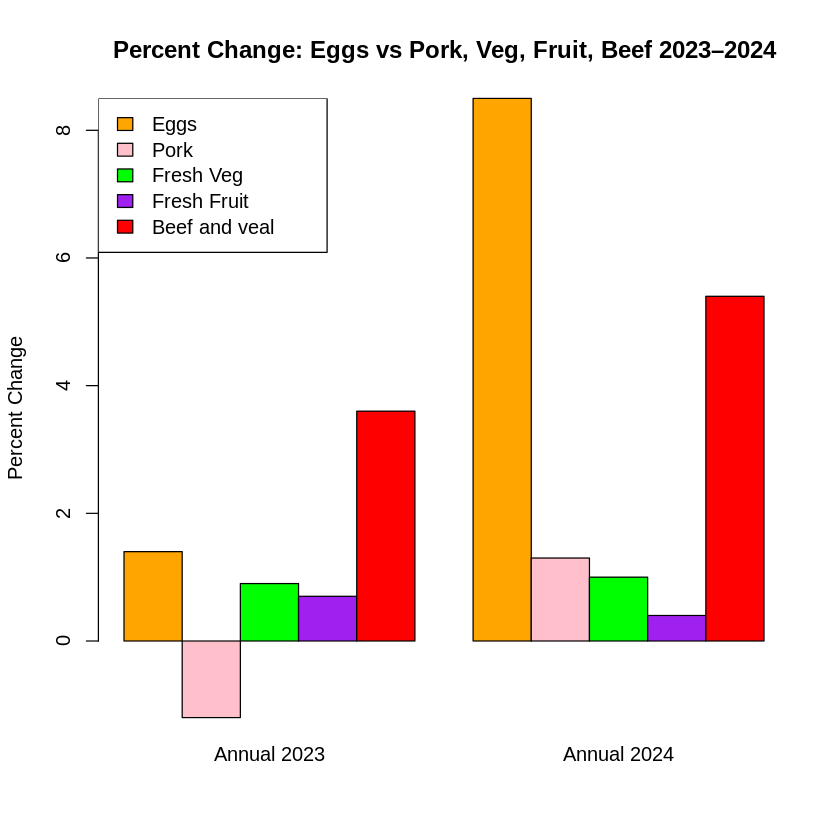

In [ ]:
plot_df <- data.frame(
  Attribute = c("Annual 2023", "Annual 2024"),
  Eggs       = c(1.4, 8.5),
  Pork       = c(-1.2, 1.3),
  FreshVeg   = c(0.9, 1),
  FreshFruit = c(0.7, 0.4),
  Beef_and_veal = c(3.6, 5.4)
)

mat <- t(as.matrix(plot_df[, c("Eggs", "Pork", "FreshVeg", "FreshFruit", "Beef_and_veal")]))
colnames(mat) <- plot_df$Attribute
# Grouped barplot
barplot(
  mat, beside = TRUE,
  col = c("orange", "pink", "green", "purple", "red"),
  ylab = "Percent Change",
  main = "Percent Change: Eggs vs Pork, Veg, Fruit, Beef 2023–2024",
  # ylim = c(0, 35)
)

legend("topleft",  legend = c("Eggs", "Pork", "Fresh Veg", "Fresh Fruit", "Beef and veal"),
       fill = c("orange", "pink", "green", "purple", "red"))





### Prediction comparison 2025 vs 2026

To compare 2025 vs 2026 forecasts across categories, I plot the midpoint with error bars (lower/middle/upper bounds). This makes it easy to see both the expected change and the forecast uncertainty.


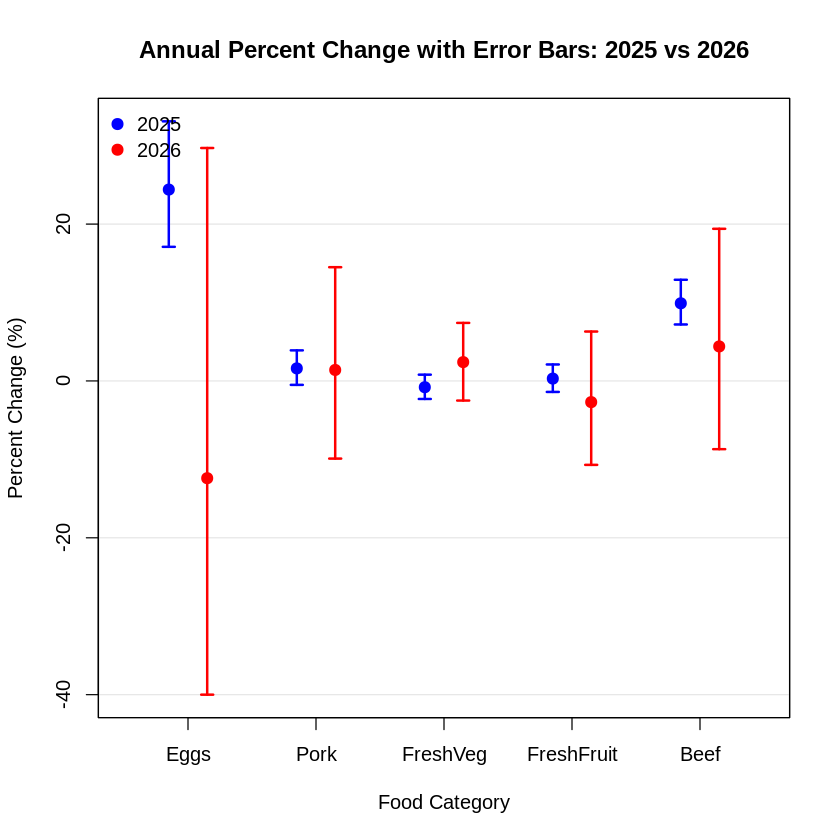

In [ ]:
Category <- c("Eggs", "Pork", "FreshVeg", "FreshFruit", "Beef")

# 2025 bounds (Lower, Mid, Upper)
L25 <- c(17.1, -0.5, -2.3, -1.4, 7.2)
M25 <- c(24.4, 1.6, -0.8, 0.3, 9.9)
U25 <- c(33.1, 3.9, 0.8, 2.1, 12.9)

# 2026 bounds (Lower, Mid, Upper)
L26 <- c(-40, -9.9, -2.5, -10.7, -8.7)
M26 <- c(-12.4, 1.4, 2.4, -2.7, 4.4)
U26 <- c(29.7, 14.5, 7.4, 6.3, 19.4)

# Compute x-positions for grouped points
n <- length(Category)
x_base <- seq_len(n)     # 1..n category anchors
offset <- 0.15           # horizontal spacing within each category group
x25 <- x_base - offset   # positions for 2025
x26 <- x_base + offset   # positions for 2026

y_min <- min(L25, L26)
y_max <- max(U25, U26)

plot(
  x = NA, y = NA,
  xlim = c(0.5, n + 0.5),
  ylim = c(y_min, y_max),
  xaxt = "n",
  xlab = "Food Category",
  ylab = "Percent Change (%)",
  main = "Annual Percent Change with Error Bars: 2025 vs 2026"
)

# X-axis labels
axis(1, at = x_base, labels = Category)

# horizontal grid
abline(h = pretty(c(y_min, y_max)), col = "grey90", lty = 1)

# Draw error bars
arrows(x25, L25, x25, U25, angle = 90, code = 3, length = 0.05, col = "blue", lwd = 2)
arrows(x26, L26, x26, U26, angle = 90, code = 3, length = 0.05, col = "red",    lwd = 2)

# Draw mid points
points(x25, M25, pch = 19, col = "blue", cex = 1.2)
points(x26, M26, pch = 19, col = "red",    cex = 1.2)

legend(
  "topleft",
  legend = c("2025", "2026"),
  pch = 19,
  col = c("blue", "red"),
  pt.cex = 1.2,
  bty = "n"
)

box()


#Conclusion

The egg prices are more volatile than overall food (Pork, Fresh Vegetables, Fresh Fruit, Beef & Veal) CPI from 2023 to 2024, eggs spiked especially more than other categories in 2024, 8% in total, and prediction for 2025–2026 show much wider uncertainty bands, reinforcing their role as the most unstable category among the foods compared. It is also really superising that egg prices predicted to have a significant drop in 2026.

The more I explore this meta data, I am getting more curious about did COVID-era supply chain disruptions or tariffs on feed imports contribute to volatility, and how might such shocks continue to shape prices? To answer these questions, I might need to dive deeper in to food supply chain disruption data post 2022, and food import/export data for feed. To see how much egg price spikes can be tied to disruptions like disease outbreaks, tariffs, or global trade dependencies, then we’re not just describing volatility—we’re identifying its potential causes.